Let's start by loading our data and doing a little feature engineering. Our data was stored with two header rows, and we don't need two header rows, so we need to change that. We need to convert our Date column to dates. And we want to extract the year; we will be using the years to indicate the passage of time in our scatter plots below.

In [1]:
import pandas as pd

AMZN = '/kaggle/input/amazon-stock-market-data-2015-2024/AMZN.csv'
df = pd.read_csv(filepath_or_buffer=AMZN, header=[0, 1])
df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,year
0,2015-01-02,15.4260,15.4260,15.7375,15.3480,15.6290,55664000,2015
1,2015-01-05,15.1095,15.1095,15.4190,15.0425,15.3505,55484000,2015
2,2015-01-06,14.7645,14.7645,15.1500,14.6190,15.1120,70380000,2015
3,2015-01-07,14.9210,14.9210,15.0640,14.7665,14.8750,52806000,2015
4,2015-01-08,15.0230,15.0230,15.1570,14.8055,15.0160,61768000,2015


Let's look at our correlations to see two things:
1. Do our adjusted close and close prices differ?
2. What do our price/volume correlations look like?

In [2]:
df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,1.000000,0.999732,0.999740,0.999419,-0.194891
Close,1.000000,1.000000,0.999732,0.999740,0.999419,-0.194891
High,0.999732,0.999732,1.000000,0.999660,0.999763,-0.188121
Low,0.999740,0.999740,0.999660,1.000000,0.999714,-0.201238
Open,0.999419,0.999419,0.999763,0.999714,1.000000,-0.193585
Volume,-0.194891,-0.194891,-0.188121,-0.201238,-0.193585,1.000000


Our correlations tell us two things:
* There are no adjustments in the adjusted close prices; this means we can use the close prices everywhere and ignore the adjusted close prices.
* Prices and volume are slightly negatively correlated, meaning that volume declines a little on average as prices rise.

Next let's look at our closing price time series.

<Axes: xlabel='Date', ylabel='Close'>

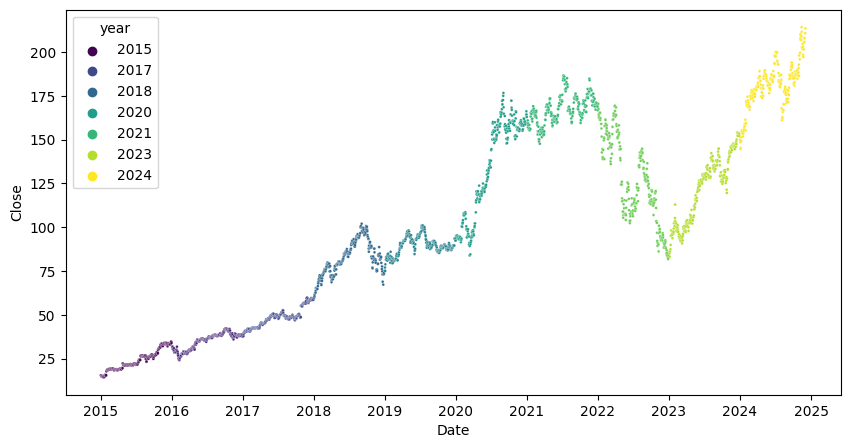

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Date', y='Close', s=4, hue='year', palette='viridis')

What do we see? We see roughly three price regimes:
1. A run-up prior to the COVID pandemic.
2. A steep run-up during the pandemic, followed by a relatively flat time and then a drop to pre-pandemic levels.
3. A new price run-up to new highs.

Frankly the number and character of regimes is a matter of opinion. If yours are better than mine good job.

Next let's look at the volume as a function of price.

<Axes: xlabel='Close', ylabel='Volume'>

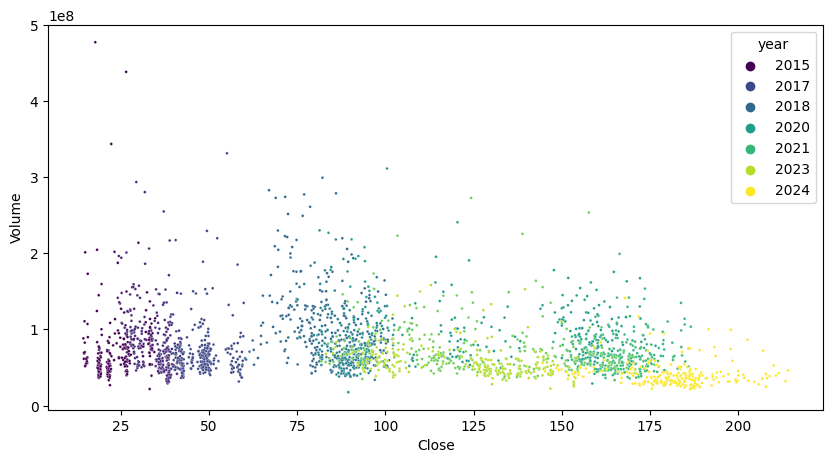

In [4]:
plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Close', y='Volume', s=4, hue='year', palette='viridis')

What do we see? On the X axis we see the progression of the price; because we have colored by year we can easily see price retrenchment in this graph. We also see a lot of variability in volume in some price regimes and more price stability in others. There's not a lot of information here, but it looks neat. By which I mean we know from above that there's a small negative correlation between the price and the volume, but we can't see it here.

<Axes: xlabel='Close', ylabel='Volume'>

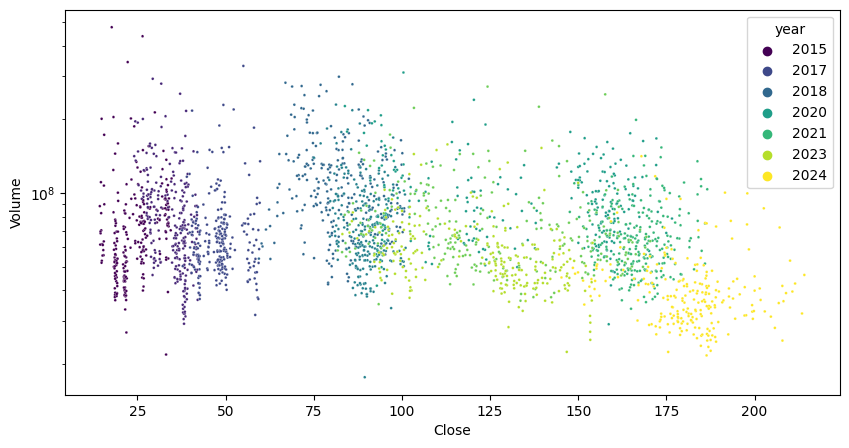

In [5]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Close', y='Volume', s=4, hue='year', palette='viridis')

If we plot the log of the volume against the prices we see a decline in the log-volume as the price increases; other than that switching to a log plot doesn't tell us much.

Let's add a variable that approximates the dollars traded each day, by mulitplying the mid price by the volume. We would expect that it would decline slightly on average over time based on what we know about the price/volume correlations.

<Axes: xlabel='Date', ylabel='dollars'>

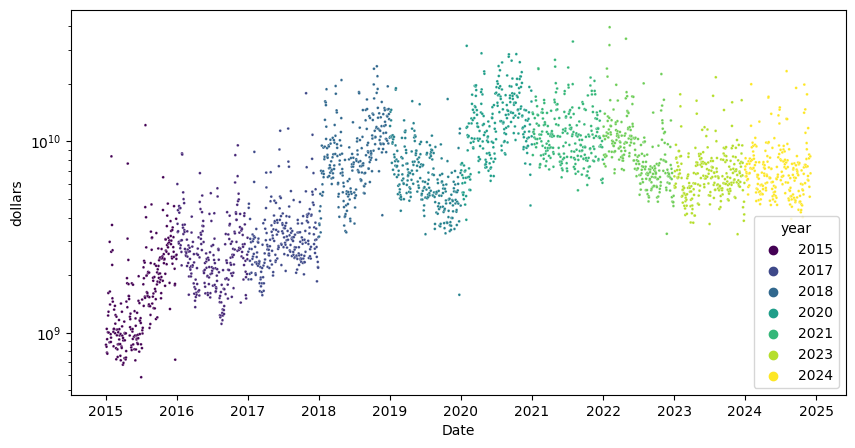

In [6]:
df['dollars'] = 0.5 * (df['High'] + df['Low']) * df['Volume']
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='dollars', s=4, hue='year', palette='viridis')

Interestingly what we actually see is that the dollars traded each day rise over time on average. They decline on average over the period starting in 2021, but they definitely rise prior to that.